# Introduction to neural network classification with Tensorflow

In this notebook we're going to learn how to write neural network for classification problems.

A classification is where you try to classify something as one thing or another.
A few types of classifiaction problems:
* Binary Classification
* Multiclass Classification
* Multilabel Classification

## Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# create circles
x, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
# Check out features
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:

# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand right now... Let's visualize it!

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0": x[:,0], "X1": x[:,1], "label": y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


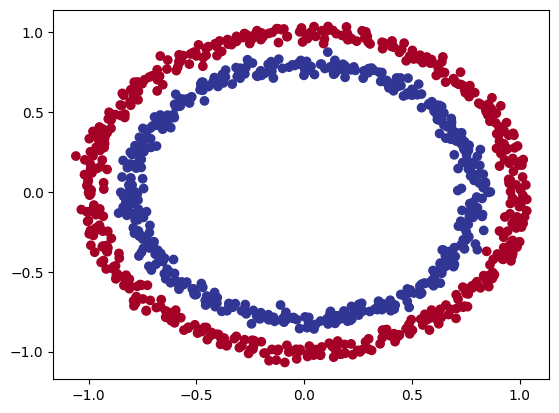

In [ ]:
# Visualize the plot
import matplotlib.pyplot as plt

plt.scatter(x[:,0], x[:,1], c=y, cmap=plt.cm.RdYlBu);

⚒ **Exercise:** Spend few minutes around playground.tensorflow.org to building and running different neural networks. See wwhat happens when you change hyperparameters.

## Input and output shapes

In [ ]:
# Check the shape of our features and label
x.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# How many samples we're working
len(x), len(y)

(1000, 1000)

In [ ]:
# View the first example of features and labell
x[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate..

In [ ]:
import tensorflow as tf

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(x, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 5s 8ms/step - loss: 1.5849 - accuracy: 0.4920
Epoch 2/5
32/32 [==============================] - 0s 6ms/step - loss: 0.7260 - accuracy: 0.5030
Epoch 3/5
32/32 [==============================] - 0s 6ms/step - loss: 0.7050 - accuracy: 0.4900
Epoch 4/5
32/32 [==============================] - 0s 7ms/step - loss: 0.6976 - accuracy: 0.4970
Epoch 5/5
32/32 [==============================] - 0s 5ms/step - loss: 0.6951 - accuracy: 0.4910


In [ ]:
# let's try and improve our model by training for longer...

model_1.fit(x, y, epochs=200, verbose=0)

In [ ]:
model_1.evaluate(x,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy... it's performing as if it's guessing.

So let's step things up a notch and add a extra layer.

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. create a model, this time with 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2.Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(x, y, epochs=100, verbose=0)

In [ ]:
# 4. evaluate the model
model_2.evaluate(x, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5000


[0.693399965763092, 0.5]

In [ ]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

## Improve our model

Let's into our bag of tricks to see how can we improve our model.

1. Create a model - we might to add more layers ot increase the number of hidden units within a layer.
2. Compiling a model - here we might to chosse a different optimizer function such as Adam instead of SGD
3. Fitting a model - perhaps we might fit our model for more epochs ( leave it train longer)

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model ( this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),   # add 100 dense neuraon
    tf.keras.layers.Dense(10),    # add another layer with 10 neurons
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(x, y, epochs=100, verbose=0 )

In [ ]:
# 4. Evaluate the model
model_3.evaluate(x, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4970


[0.6940839290618896, 0.4970000088214874]

🔑**Note:** Whenever your model is performing strangely or there's something going om with your data you're not quite sure of, remember these three words: **Visualize, visualize, visualize**. Inspect your data, inpect your model, inpect your model's predictions.

To visualize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:

* Take in a trained model, features (x) and labels (y)
* Create a meshgrid of the different x values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [ ]:
import numpy as np

def plot_decision_boundary(model, x, y):
  """
  plots the decision boundary created by a model predicting on x.
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = x[:,0].min() - 0.1, x[:,0].max() + 0.1
  y_min, y_max = x[:,1].min() - 0.1, x[:,1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create x value ( we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our predicton to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)

  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(x[:,0], x[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [ ]:
x,y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

313/313 [==============================] - 0s 1ms/step
doing binary classification


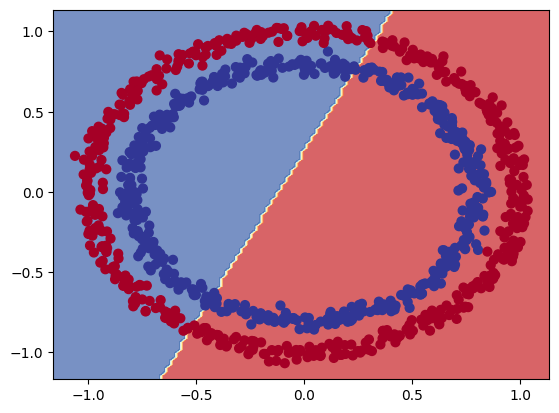

In [ ]:
# chek out the predictions our model is making
plot_decision_boundary(model=model_3,
                       x=x,
                       y=y)

In [ ]:
# Let's see if our model can be used for a regression problem

tf.random.set_seed(42)

# create some regresssion data
x_reg = tf.range(0,1000,5)
y_reg = tf.range(100,1100,5) # y = x + 100

# Split our regression data in to training and test data
x_reg_train = x_reg[:160]
x_reg_test = x_reg[160:]

y_reg_train = y_reg[:160]
y_reg_test = y_reg[160:]

# Fit our model to the regression data
model_3.fit(tf.expand_dims(x_reg_train,axis=-1), y_reg_train, epochs=100)

Epoch 1/100


ValueError: ignored

Oh wait... We complied our model for a binary classification problem.

But.. We're now working on a regression problem, let's change the model to suit our data

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model ( this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),   # add 100 dense neuraon
    tf.keras.layers.Dense(10),    # add another layer with 10 neurons
    tf.keras.layers.Dense(1)
])

# 2. Compile the model, this time with a regression-specific loss function
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(x_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 532.2859 - mae: 532.2859
Epoch 2/100
5/5 [==============================] - 0s 6ms/step - loss: 401.2105 - mae: 401.2105
Epoch 3/100
5/5 [==============================] - 0s 6ms/step - loss: 264.9953 - mae: 264.9953
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 128.8332 - mae: 128.8332
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 57.7019 - mae: 57.7019
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 93.8283 - mae: 93.8283
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 76.4593 - mae: 76.4593
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 45.5625 - mae: 45.5625
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 51.4899 - mae: 51.4899
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 43.4327 - mae: 43.4327
Epoch 11/100
5/5 [==============================] -

2/2 [==============================] - 0s 5ms/step


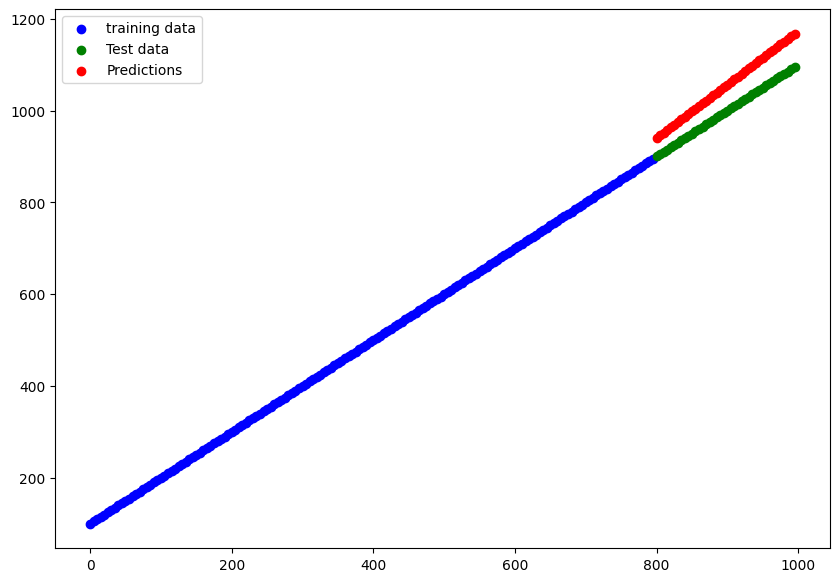

In [ ]:
# Make prediction with our trained model
y_reg_preds = model_3.predict(x_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10,7))
plt.scatter(x_reg_train, y_reg_train, c='b', label='training data')
plt.scatter(x_reg_test, y_reg_test, c='g', label='Test data')
plt.scatter(x_reg_test, y_reg_preds, c='r', label = 'Predictions')
plt.legend();

## The missing piece: Non-linearity

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='linear')
])

# 2. Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

# 3. Fit the model
history = model_4.fit(x, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 6.1142 - accuracy: 0.4880
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0902 - accuracy: 0.4910
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0456 - accuracy: 0.4890
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 6.0289 - accuracy: 0.4880
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0261 - accuracy: 0.4900
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9943 - accuracy: 0.4910
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9647 - accuracy: 0.4900
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9066 - accuracy: 0.4880
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8625 - accuracy: 0.4870
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8617 - accuracy: 0.4870
Epoch 11/

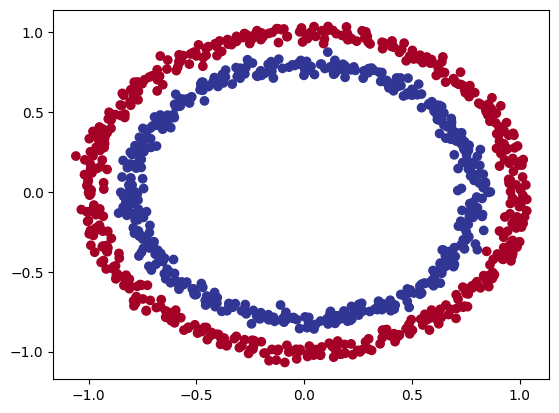

In [ ]:
# Check out our data
plt.scatter(x[:,0], x[:,1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 1s 1ms/step
doing binary classification


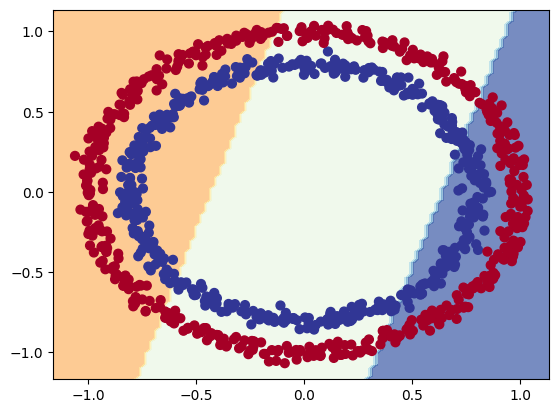

In [ ]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_4,
                       x=x,
                       y=y)

Let's try build our first neural network with non-linear activation function

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile the model
model_5.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# 3. Fit the model
history_5 = model_5.fit(x, y, epochs=100)


Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.9632 - accuracy: 0.4890
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9397 - accuracy: 0.4890
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9332 - accuracy: 0.4890
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9310 - accuracy: 0.4890
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9293 - accuracy: 0.4890
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9280 - accuracy: 0.4890
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9265 - accuracy: 0.4890
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8976 - accuracy: 0.4890
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8696 - accuracy: 0.4840
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8688 - accuracy: 0.4830
Epoch 11/

313/313 [==============================] - 1s 2ms/step
doing binary classification


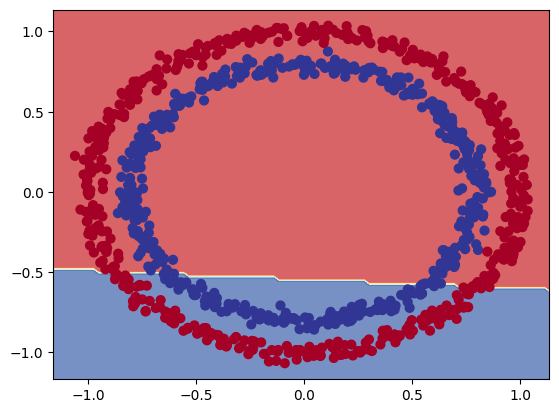

In [ ]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_5,
                       x=x,
                       y=y)

In [ ]:
# Time to replicate the multi-layer neural networ from Tensorflow playground

# Set the random seed
tf.random.set_seed(42)

# 1. create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# 3. Fit the model
history_6 = model_6.fit(x, y, epochs=500)

Epoch 1/500
32/32 [==============================] - 2s 4ms/step - loss: 3.0195 - accuracy: 0.5000
Epoch 2/500
32/32 [==============================] - 0s 4ms/step - loss: 1.7438 - accuracy: 0.4740
Epoch 3/500
32/32 [==============================] - 0s 3ms/step - loss: 0.8967 - accuracy: 0.4810
Epoch 4/500
32/32 [==============================] - 0s 4ms/step - loss: 0.8600 - accuracy: 0.4840
Epoch 5/500
32/32 [==============================] - 0s 4ms/step - loss: 0.8398 - accuracy: 0.4870
Epoch 6/500
32/32 [==============================] - 0s 4ms/step - loss: 0.8227 - accuracy: 0.4860
Epoch 7/500
32/32 [==============================] - 0s 4ms/step - loss: 0.8084 - accuracy: 0.4680
Epoch 8/500
32/32 [==============================] - 0s 3ms/step - loss: 0.7958 - accuracy: 0.4360
Epoch 9/500
32/32 [==============================] - 0s 3ms/step - loss: 0.7857 - accuracy: 0.4090
Epoch 10/500
32/32 [==============================] - 0s 4ms/step - loss: 0.7766 - accuracy: 0.3980
Epoch 11/

In [ ]:
# Evaluate the model
model_6.evaluate(x, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0051 - accuracy: 0.9980


[0.005101146176457405, 0.9980000257492065]

313/313 [==============================] - 0s 1ms/step
doing binary classification


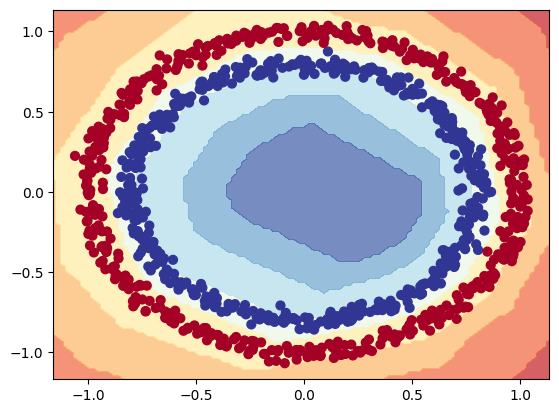

In [ ]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_6,
                       x=x,
                       y=y)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# 3. fit the model
history_7 = model_7.fit(x, y, epochs=150)

Epoch 1/150
32/32 [==============================] - 1s 2ms/step - loss: 0.7112 - accuracy: 0.5040
Epoch 2/150
32/32 [==============================] - 0s 2ms/step - loss: 0.7033 - accuracy: 0.4920
Epoch 3/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6990 - accuracy: 0.4860
Epoch 4/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6965 - accuracy: 0.4860
Epoch 5/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.4390
Epoch 6/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4880
Epoch 7/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.4920
Epoch 8/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.4990
Epoch 9/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.5020
Epoch 10/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6868 - accuracy: 0.5030
Epoch 11/

In [ ]:
# 4. Evaluate the model
model_7.evaluate(x,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0335 - accuracy: 1.0000


[0.03350270539522171, 1.0]

313/313 [==============================] - 0s 1ms/step
doing binary classification


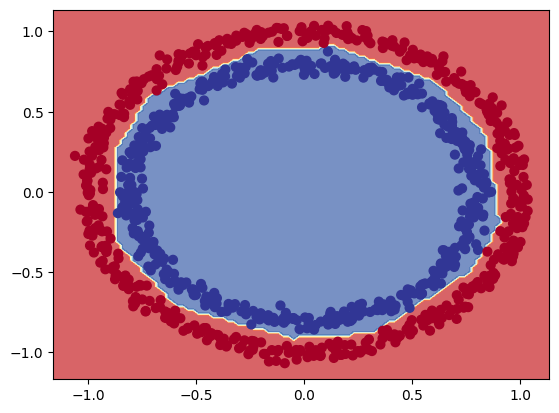

In [ ]:
# Let's visualize our incredible metrics
plot_decision_boundary(model_7, x,y)

🤔**Question:** what's wrong the predictions we've made? Are we really evaluating our model correctly? Hint: what ddata did the model learn on and what data did we predict on?

🔑 **Note:** The combination of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

Now we've discussed the concept of linear and non-linear functions (or lines), let's see them in action.

In [ ]:
# create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A


<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

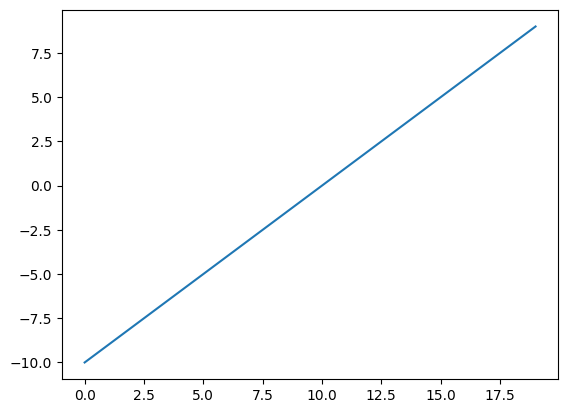

In [ ]:
# Visualize our toy tensor
plt.plot(A)

In [ ]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1+ exp(-x))

def sigmoid_func(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid_func(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

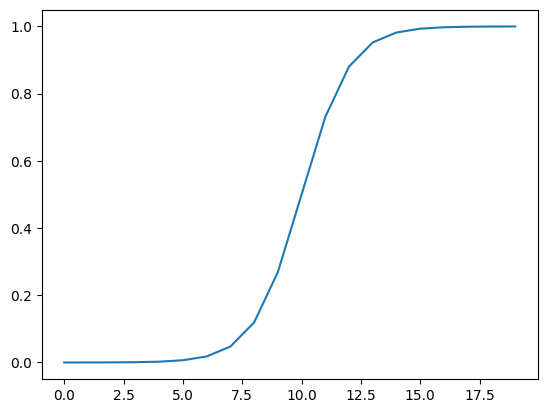

In [ ]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid_func(A));

In [ ]:
# Let's recreate the relu function
def relu_func(x):
  return tf.maximum(0, x)

relu_func(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

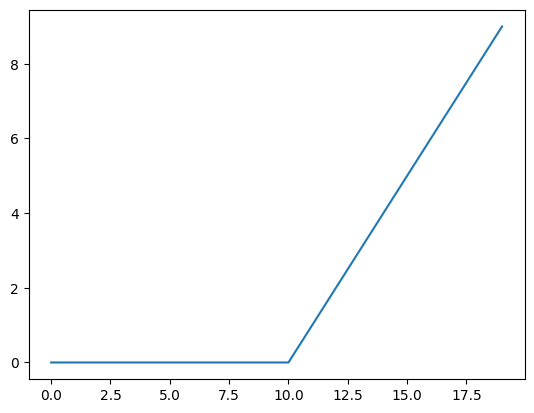

In [ ]:
# Plot the toy tensor transformed by relu function
plt.plot(relu_func(A))

In [ ]:
tf.maximum(-5, A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-5., -5., -5., -5., -5., -5., -4., -3., -2., -1.,  0.,  1.,  2.,
        3.,  4.,  5.,  6.,  7.,  8.,  9.], dtype=float32)>

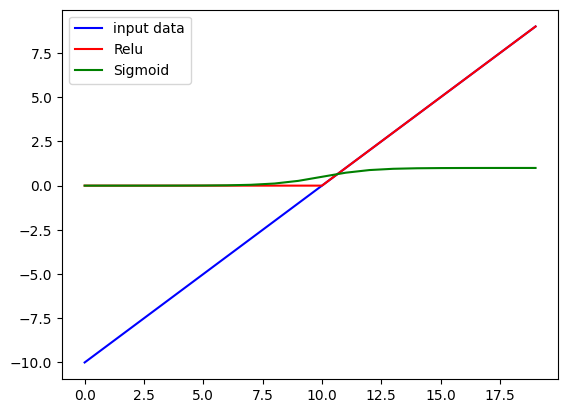

In [ ]:
plt.figure()
plt.plot(A, c='b', label='input data')
plt.plot(tf.maximum(0, A), c='r', label='Relu')
plt.plot(sigmoid_func(A), c='g', label='Sigmoid')
plt.legend()

In [ ]:
# Let's try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

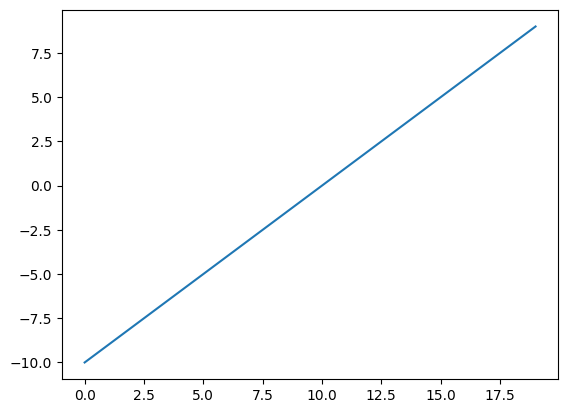

In [ ]:
# Does linear activation function change anything?
plt.plot(tf.keras.activations.linear(A))

In [ ]:
# Does A even change?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our classification

So far we've been training and testing on the same dataset...

However, in ML this is basically sin.
So let's create a training and test set.

In [ ]:
# Check how many examples we have
len(x)

1000

In [ ]:
x, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
# Let's recreate a model to fit on the training data and evaluate in testing data

# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model 7)
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_8.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

# 3. Fit the model
history_8 = model_8.fit(x_train, y_train, epochs=50)

Epoch 1/50
25/25 [==============================] - 1s 2ms/step - loss: 0.6898 - accuracy: 0.5088
Epoch 2/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.5663
Epoch 3/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6654 - accuracy: 0.6037
Epoch 4/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6472 - accuracy: 0.7100
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6223 - accuracy: 0.6500
Epoch 6/50
25/25 [==============================] - 0s 2ms/step - loss: 0.5684 - accuracy: 0.8888
Epoch 7/50
25/25 [==============================] - 0s 2ms/step - loss: 0.4925 - accuracy: 0.9325
Epoch 8/50
25/25 [==============================] - 0s 2ms/step - loss: 0.4008 - accuracy: 0.9775
Epoch 9/50
25/25 [==============================] - 0s 3ms/step - loss: 0.3115 - accuracy: 0.9787
Epoch 10/50
25/25 [==============================] - 0s 2ms/step - loss: 0.2625 - accuracy: 0.9663
Epoch 11/50
25/25 [

In [ ]:
# 4.Evaluate the model on the test dataset
model_8.evaluate(x_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0173 - accuracy: 0.9950


[0.017307531088590622, 0.9950000047683716]

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


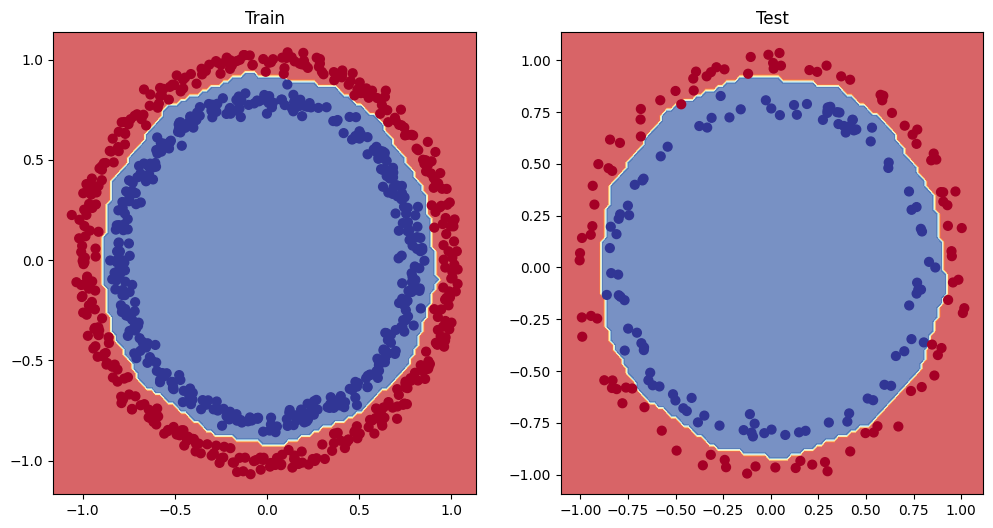

In [ ]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8, x_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8, x_test, y_test)
plt.show();

## Plot the loss (or training curve)

In [ ]:
# Convert the history object into a DataFrame
x = pd.DataFrame(history_8.history)
x

,loss,accuracy
0,0.689848,0.50875
1,0.679429,0.56625
2,0.665420,0.60375
3,0.647224,0.71000
4,0.622346,0.65000
5,0.568373,0.88875
6,0.492496,0.93250
7,0.400822,0.97750
8,0.311462,0.97875
9,0.262473,0.96625


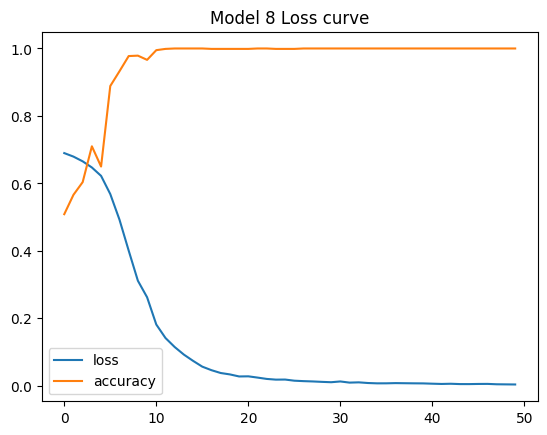

In [ ]:
# Plot the loss curve
x.plot()
plt.title("Model 8 Loss curve");

🔑**Note:** For many problems, the loss function going down means the model is improving ( the predictions it's making are getting ground truth labels).

## Find the best learning rate

To find the ideal learning rate ( the learning rate where the loss decreases the most during training) we're going to use the following steps:

* A learning rate **callback** - you can thick of a callback as an extra piece of functionality, you can add to your model *while* it's training.
* Another model (we could use the same one as above, but we're practicing building models here)
* A modified loss curves plot.


In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model (same as model_8 )
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

# 2. Compile the model
model_9.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler( lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model (passing lr_scheduker callback)
history_9 = model_9.fit(x_train,
                        y_train,
                        epochs=100,
                        callbacks=[lr_scheduler])


Epoch 1/100
25/25 [==============================] - 1s 4ms/step - loss: 0.6931 - accuracy: 0.4963 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.4925 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.4938 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.4963 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.4950 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.4963 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.4988 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5013 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

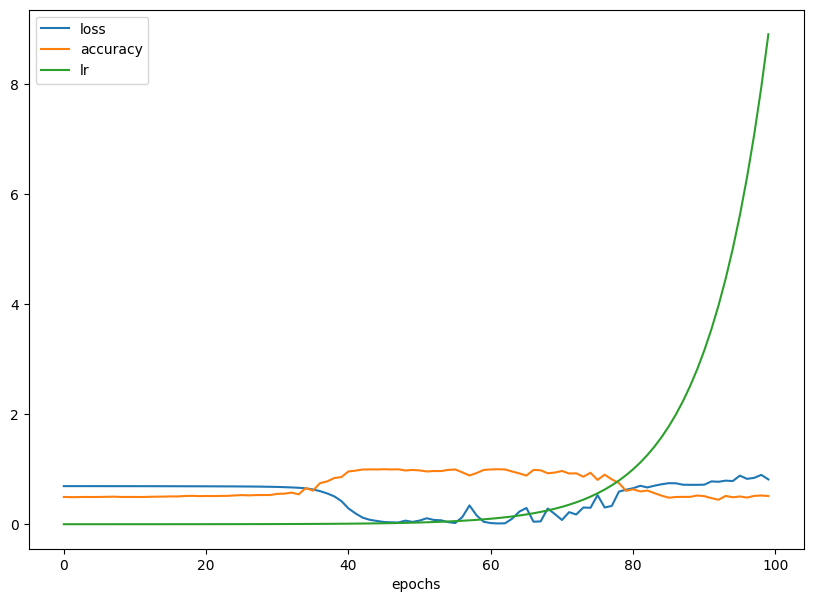

In [ ]:
# Checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10,7), xlabel="epochs");

Text(0.5, 1.0, 'Learning rate vs loss')

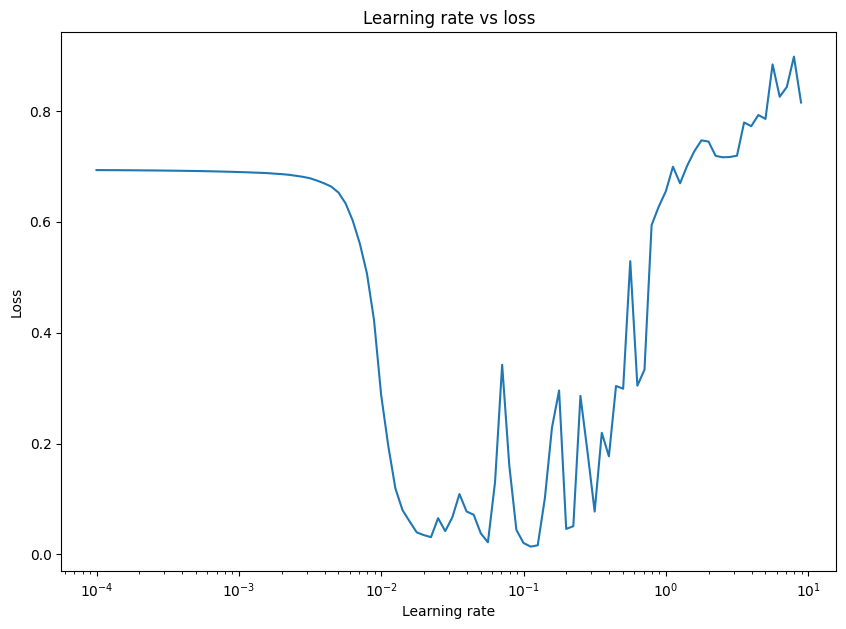

In [ ]:
# Plot the learning rate verses the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs loss")

In [ ]:
# Example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [ ]:
# Let's try using a higher *ideal* learning rate with same model

# Set random seed
tf.random.set_seed(42)

# 1. Create a model (same as model_8 )
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

# 2. Compile the model
model_10.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.022),
                metrics=['accuracy'])


# Fit the model (passing lr_scheduker callback)
history_10 = model_10.fit(x_train,
                          y_train,
                          epochs=20,)


Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.6697 - accuracy: 0.6100
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6107 - accuracy: 0.7525
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5304 - accuracy: 0.8363
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3791 - accuracy: 0.9388
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2534 - accuracy: 0.9775
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.1413 - accuracy: 0.9937
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.0974 - accuracy: 0.9900
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.0688 - accuracy: 0.9925
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.0483 - accuracy: 1.0000
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.0526 - accuracy: 0.9912
Epoch 11/20
25/25 [

In [ ]:
# Evaluate model 10 on test dataset
model_10.evaluate(x_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0870 - accuracy: 0.9550


[0.08695879578590393, 0.9549999833106995]

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


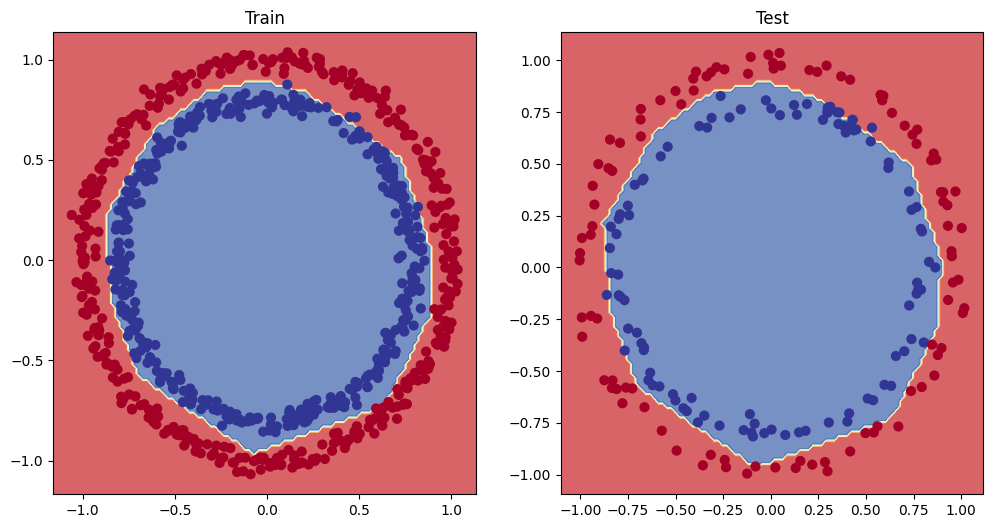

In [ ]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10, x_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10, x_test, y_test)
plt.show();

## More classification evaluation methods

Alongside visualizing our models results as much as possible, there are a handful of other classification evaluation methods & metrics you should be familiar with:

* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from scikit learn)

In [ ]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(x_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 7ms/step - loss: 0.0870 - accuracy: 0.9550
Model loss on the test set: 0.08695879578590393
Model accuracy on the test set: 95.50%


How about a confusion matrix?

In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(x_test)

# Create confusion matrix
confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 3ms/step


ValueError: ignored

In [ ]:
y_test[:10]

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0])

In [ ]:
y_preds[:10]

array([[9.9963021e-01],
       [2.9012866e-03],
       [9.9853140e-01],
       [1.2851952e-05],
       [9.8723286e-01],
       [9.9012828e-01],
       [3.1544218e-06],
       [4.5121024e-07],
       [9.8097211e-01],
       [4.5660199e-04]], dtype=float32)

Oops... looks like our predictions array has come out in **Prediction probability** form.. the standard output from the sigmoid (or softmax) activation functions.

In [ ]:
# Convert prediction probailities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
# Create confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[99,  1],
       [ 8, 92]])

How about we prettify our confusion matrix?

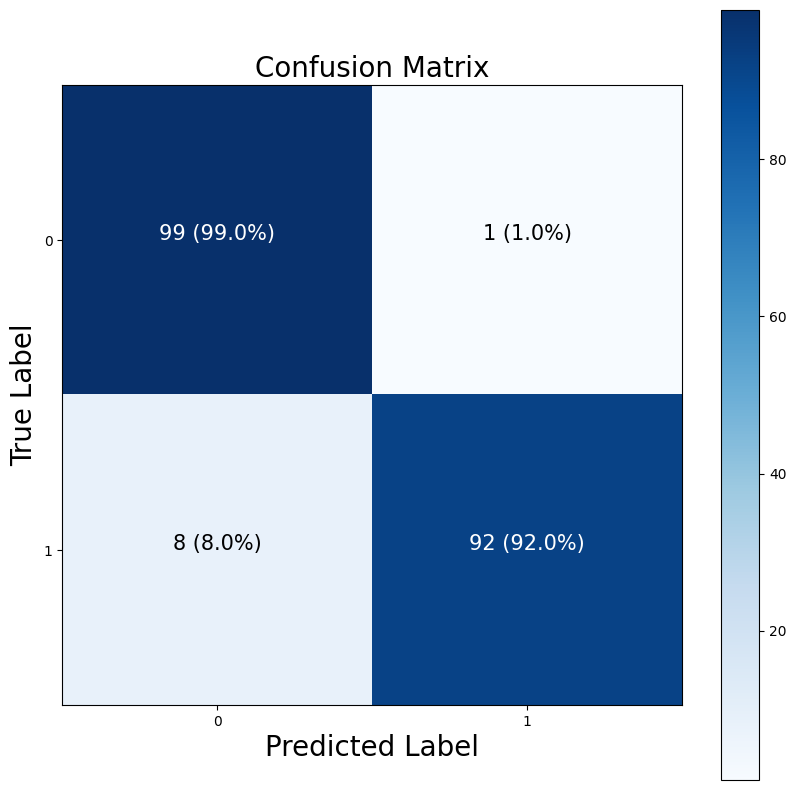

In [ ]:
# Note: the confusion matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix

import itertools

figsize = (10,10)

# Create the confusion matrix
cm = confusion_matrix(y_test,  tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1) [:, np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axis
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set the threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Set the x-axis label
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)


# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j] * 100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i,j] > threshold else "black",
           size=15)

In [ ]:
import itertools

def plot_confusion_matrix(y_test, y_preds):

  # Note: the confusion matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix
  figsize = (10,10)

  # Create the confusion matrix
  cm = confusion_matrix(y_test,  tf.round(y_preds))
  cm_norm = cm.astype("float") / cm.sum(axis=1) [:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Create classes
  classes = False

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axis
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Set the x-axis label
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(20)
  ax.xaxis.label.set_size(20)
  ax.title.set_size(20)


  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j] * 100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i,j] > threshold else "black",
            size=15)


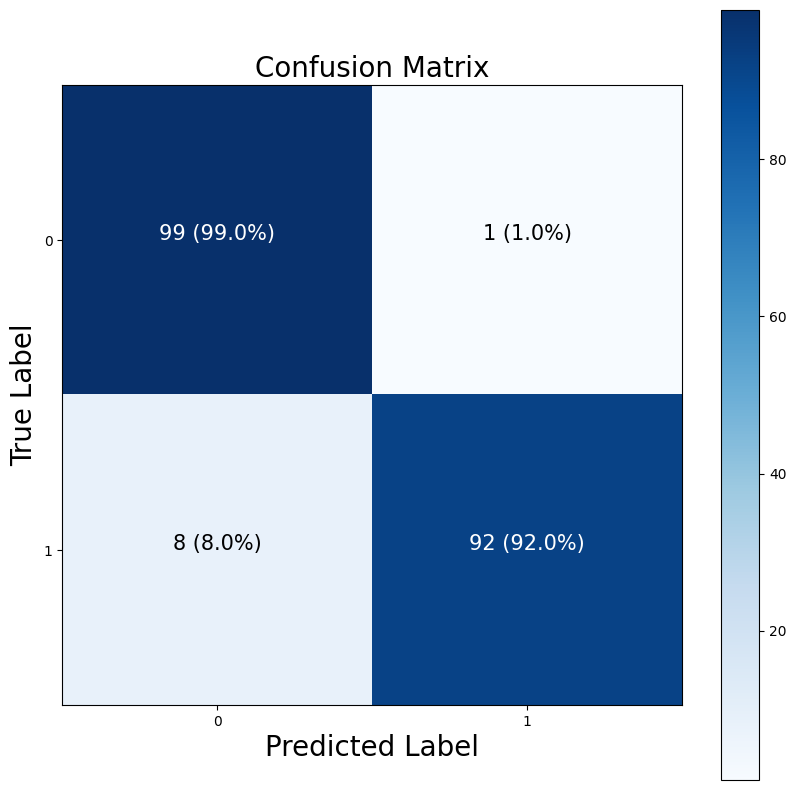

In [ ]:
plot_confusion_matrix(y_test, y_preds)

# Working with a larger example ( Multiclass Classification)


When you have more than two classes as an option, it's known as **multi-class classifiaction**.
* This means if you have 3 different classes, it's multi-class classification.
* It also means if you have 100 different classes, it's multi-class classification.

To practice multi-class classification, we're going to build a neural to classify image of different items of clothing.


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training Label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

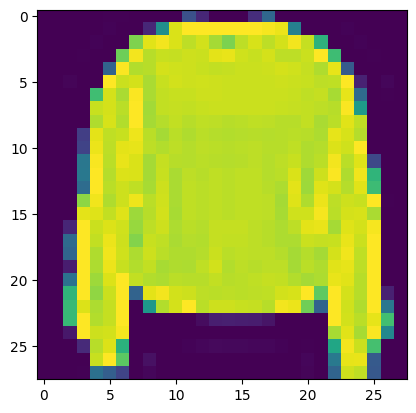

In [ ]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [ ]:
# Check out the sample label
train_labels[7]

2

In [ ]:
# Create a0 small list so we can index onto our training labels so they're human-readable
class_names = ["T-shirt-top",	"Trouser", "Pullover",	"Dress",	"Coat",	"Sandal",	"Shirt",	"Sneaker","Bag","Ankle boot"]
len(class_names)

10

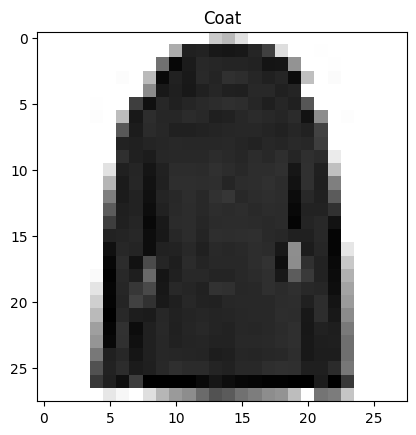

In [ ]:
# plot an example image and its label
index_of_choice = 2000
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]]);

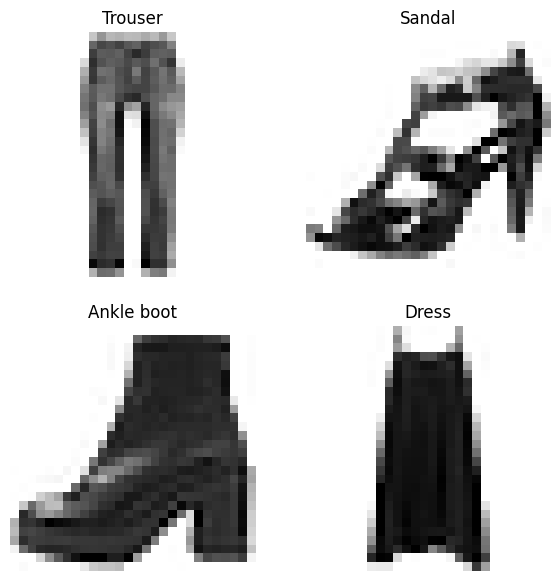

In [ ]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multi-class classification model

For our multi-class classification model, we can use a similar architecture to our binary classifiers, however, we're going to have to tweal a few things:
* Input shape = 28 x 28 (the shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
  * If your labels are one-hot encoded, use CategoricalCrossentropy()
  * If your labels are integer form use SparseCategoricalCrossentropy()
* Output layer activation = softmax(not simoid)


In [ ]:
# Our data needs to be flattened (from 28*28 to None 784)
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

(None, 784)

In [ ]:
tf.one_hot(train_labels,depth=10)

<tf.Tensor: shape=(60000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data,test_labels))

Epoch 1/10
1875/1875 [==============================] - 12s 4ms/step - loss: 2.4238 - accuracy: 0.0983 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0988 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accura

In [ ]:
# Check the model summary
model_11.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 6)                 4710      
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 10)                70        
                                                                 
Total params: 4822 (18.84 KB)
Trainable params: 4822 (18.84 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Check the min and max valkues of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this means they like to have the numbers in the tensors they try to find patterns between 0 & 1.

In [ ]:
# We can get our training and testing data between 0 & 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max values of the scaled training data
train_data_norm.min(), test_data_norm.max()


(0.0, 1.0)

In [ ]:
# Now our data is normalized, let's build a model to find patterns in it

# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# fit the model
norm_history = model_12.fit(train_data_norm,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 1.1600 - accuracy: 0.5732 - val_loss: 0.7365 - val_accuracy: 0.7476
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6224 - accuracy: 0.7887 - val_loss: 0.6165 - val_accuracy: 0.8006
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5685 - accuracy: 0.8070 - val_loss: 0.6056 - val_accuracy: 0.7951
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5486 - accuracy: 0.8134 - val_loss: 0.5832 - val_accuracy: 0.8077
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5378 - accuracy: 0.8168 - val_loss: 0.5810 - val_accuracy: 0.8022
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5290 - accuracy: 0.8181 - val_loss: 0.5757 - val_accuracy: 0.8073
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5241 - accuracy: 0.8194 - val_loss: 0.5819 - val_accuracy

> 🔑 **Note:** Neural networks tend to prefer data in numerical form as well as scaled/normalized (numbers between 0 & 1).

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Non norm model')

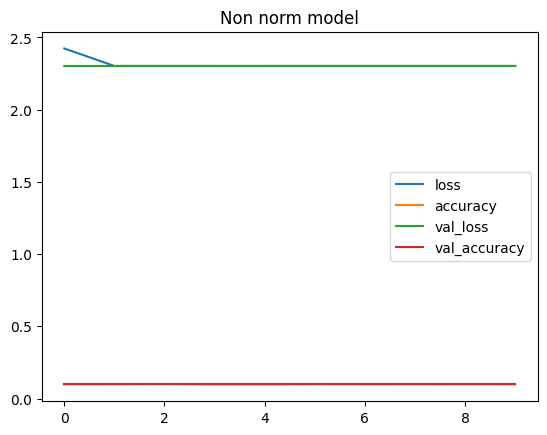

In [ ]:
# Ploting the loss curve for non_norm_hsitory
nnh = pd.DataFrame(non_norm_history.history)
nnh.plot()
plt.title("Non norm model")

Text(0.5, 1.0, 'Norm model')

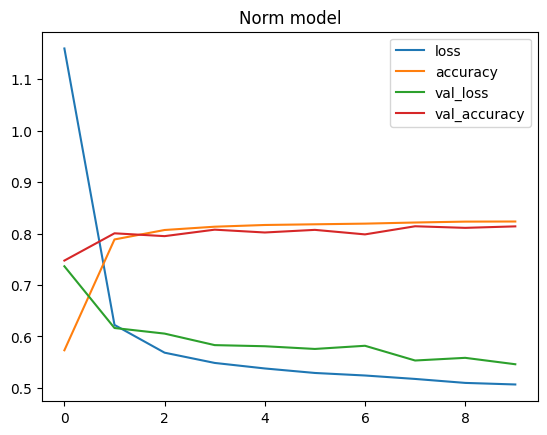

In [ ]:
# Ploting the loss curve for nnorm_hsitory
nh = pd.DataFrame(norm_history.history)
nh.plot()
plt.title("Norm model")

<Axes: title={'center': 'Normalized Model'}>

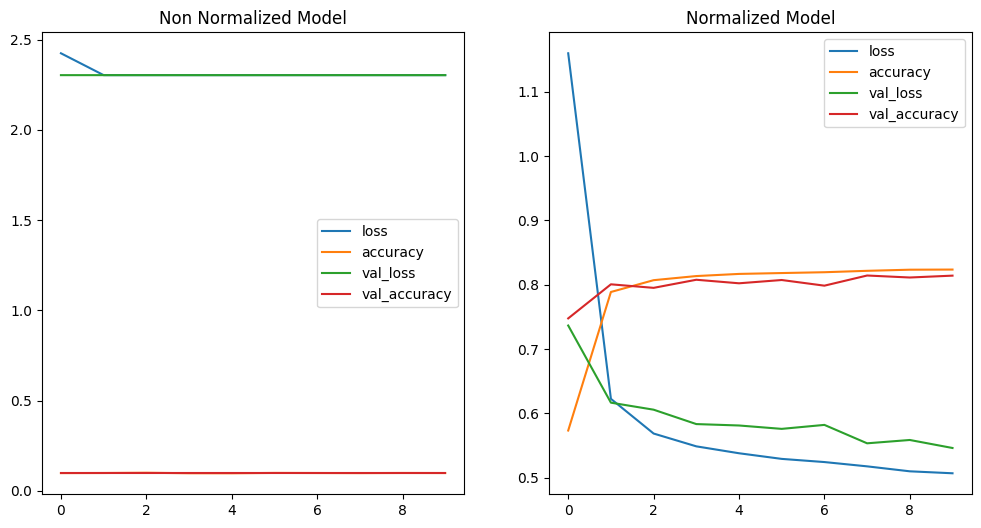

In [ ]:
# Create subplot for this
fig, axes = plt.subplots(figsize=(12,6), nrows=1, ncols=2,)
nnh.plot(ax=axes[0], title="Non Normalized Model")
nh.plot(ax=axes[1],  title="Normalized Model")

<Axes: title={'center': 'Normalized Model'}>

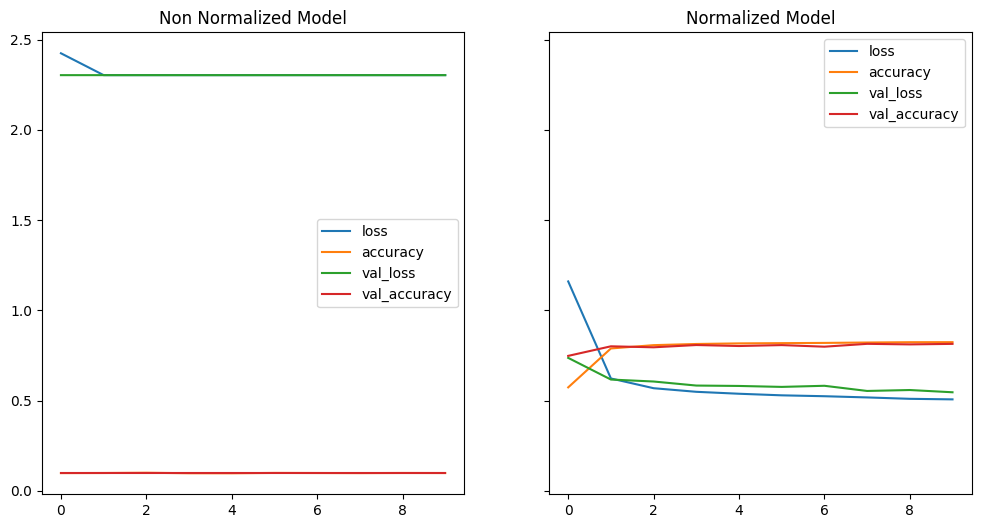

In [ ]:
# Create subplot for this
fig, axes = plt.subplots(figsize=(12,6), nrows=1, ncols=2, sharex=True, sharey=True)
nnh.plot(ax=axes[0], title="Non Normalized Model")
nh.plot(ax=axes[1],  title="Normalized Model")

> 🔑**Note:** The same model with even *slightly different* data can produce *dramatically* different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture)

## Finding the ideal learning rate

In [ ]:
# set the random seed
tf.random.set_seed(42)

# Create model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))


# Fit the model
find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data_norm, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 9s 4ms/step - loss: 0.8703 - accuracy: 0.6972 - val_loss: 0.6037 - val_accuracy: 0.7980 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5375 - accuracy: 0.8141 - val_loss: 0.5290 - val_accuracy: 0.8201 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4869 - accuracy: 0.8311 - val_loss: 0.5051 - val_accuracy: 0.8226 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4658 - accuracy: 0.8380 - val_loss: 0.5136 - val_accuracy: 0.8205 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4550 - accuracy: 0.8402 - val_loss: 0.4888 - val_accuracy: 0.8324 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4463 - accuracy: 0.8428 - val_loss: 0.5120 - val_accuracy: 0.8189 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 6

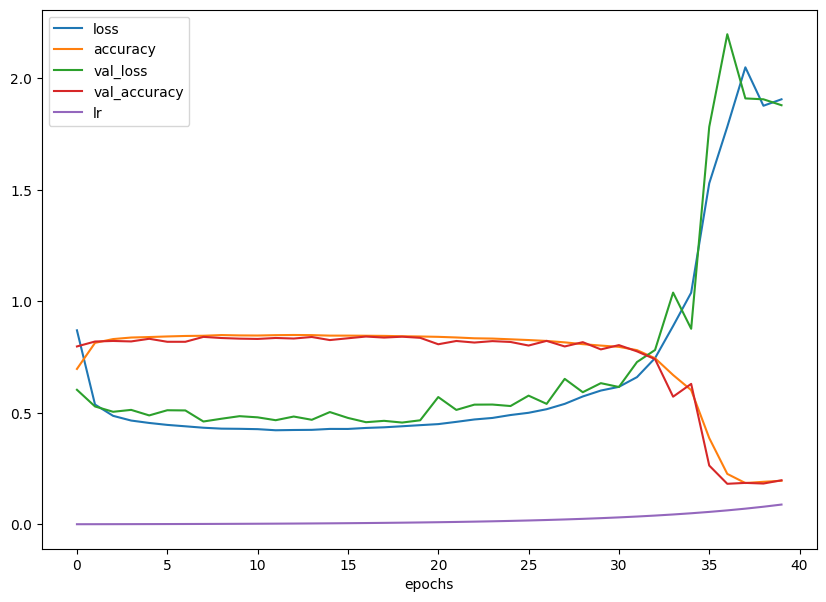

In [ ]:
# Checkout the learning rate history
pd.DataFrame(find_lr_history.history).plot(figsize=(10,7), xlabel="epochs");

Text(0.5, 1.0, 'Finding the Idela Learning rate')

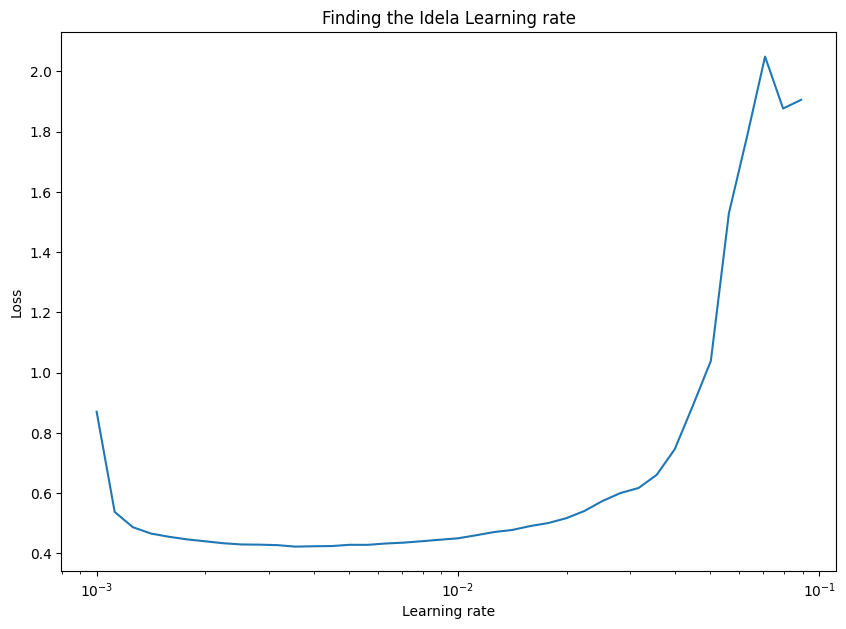

In [ ]:
# Plot the learning rate verses the loss
lrs = 1e-3 * (10 ** (tf.range(40)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the Idela Learning rate")

In [ ]:
10**-3

0.001

In [ ]:
# Let's refit the model with the ideal learning rate

# set random seed
tf.random.set_seed(42)

# Create a model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=['accuracy'])

# Fit the model
history_14 = model_14.fit(train_data_norm,
                          train_labels,
                          epochs=20,
                          validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 11s 3ms/step - loss: 1.0019 - accuracy: 0.6368 - val_loss: 0.6640 - val_accuracy: 0.7712
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5944 - accuracy: 0.7939 - val_loss: 0.5874 - val_accuracy: 0.8008
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5374 - accuracy: 0.8138 - val_loss: 0.5556 - val_accuracy: 0.8076
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5075 - accuracy: 0.8241 - val_loss: 0.5353 - val_accuracy: 0.8153
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4909 - accuracy: 0.8280 - val_loss: 0.5310 - val_accuracy: 0.8152
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4775 - accuracy: 0.8319 - val_loss: 0.5237 - val_accuracy: 0.8152
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4696 - accuracy: 0.8332 - val_loss: 0.5456 - val_accuracy

## Evaluating our muiti-class classification model

To evaluate our multi-class classification model we could:
* Evaluate its performance using other classification metrics (Such as a confusion matrix)
* Assess some of its predictions (through visualization)
* Improve its results (by training it for longer or changing the architecture)
* Save and export it for use in an application

Let's go through the top 2...

In [ ]:
# Create a confusion matrix

import itertools
from sklearn.metrics import confusion_matrix
import numpy as np


def make_confusion_matrix(y_true, y_pred, classes,figsize=(10,10), text_size=15):

  # Note: the confusion matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix

  # Create the confusion matrix
  cm = confusion_matrix(y_true,  y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1) [:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axis
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Set the x-axis label
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)


  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j] * 100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i,j] > threshold else "black",
            size=text_size)


In [ ]:
class_names

['T-shirt-top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
# Make some predictions with our model
y_probs = model_14.predict(test_data_norm) # Probs is short for prediction probabilities

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 3ms/step


array([[8.7537417e-09, 1.5547768e-05, 2.2857203e-07, 2.8584967e-05,
        1.6651519e-07, 5.8946971e-02, 1.2022909e-09, 1.9446731e-02,
        3.7945810e-04, 9.2118233e-01],
       [6.3713080e-05, 1.7006944e-12, 9.4615698e-01, 4.4348309e-07,
        4.8550949e-02, 1.8201604e-09, 5.2279308e-03, 3.7806913e-23,
        1.6037152e-08, 4.5471009e-28],
       [3.5629491e-04, 9.9760807e-01, 2.3121156e-10, 2.0348204e-03,
        1.4064547e-09, 1.5044242e-07, 6.3321954e-07, 4.1100585e-16,
        7.8979497e-12, 1.0508759e-08],
       [1.3826841e-04, 9.9324012e-01, 1.2059667e-09, 6.6032805e-03,
        4.6400279e-09, 4.2304277e-06, 9.2225399e-08, 6.6586209e-14,
        1.8347518e-10, 1.4024819e-05],
       [1.8955992e-01, 2.6524888e-04, 1.1814540e-01, 2.6774809e-02,
        4.8742138e-02, 1.3599899e-05, 6.1499250e-01, 7.2528628e-10,
        1.5063653e-03, 1.0267654e-10]], dtype=float32)

> 🔑**Note:** Remember to make predictions on the same kind of data your model was trained on (e.g. if your model was trained on normalized data, you'll want to make predictions on normalized data).

In [ ]:
y_probs[0], tf.argmax(y_probs[0]), class_names[ tf.argmax(y_probs[0])]

(array([8.7537417e-09, 1.5547768e-05, 2.2857203e-07, 2.8584967e-05,
        1.6651519e-07, 5.8946971e-02, 1.2022909e-09, 1.9446731e-02,
        3.7945810e-04, 9.2118233e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [ ]:
# Convert all of the prediction probablities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[788,   8,  13,  75,   3,   2,  95,   0,  15,   1],
       [ 12, 933,   0,  49,   1,   1,   3,   0,   1,   0],
       [ 39,   0, 731,  14, 110,   0,  97,   0,   9,   0],
       [ 46,  16,   7, 838,  33,   1,  44,   0,  13,   2],
       [  5,   0, 134,  45, 689,   0, 119,   0,   8,   0],
       [  0,   1,   1,   1,   0, 934,   0,  39,   4,  20],
       [154,   1, 108,  51,  99,   4, 561,   0,  22,   0],
       [  0,   0,   0,   0,   0,  34,   0, 918,   1,  47],
       [  2,   0,   8,   7,   6,   2,  37,   5, 931,   2],
       [  0,   0,   0,   1,   0,  19,   0,  33,   4, 943]])

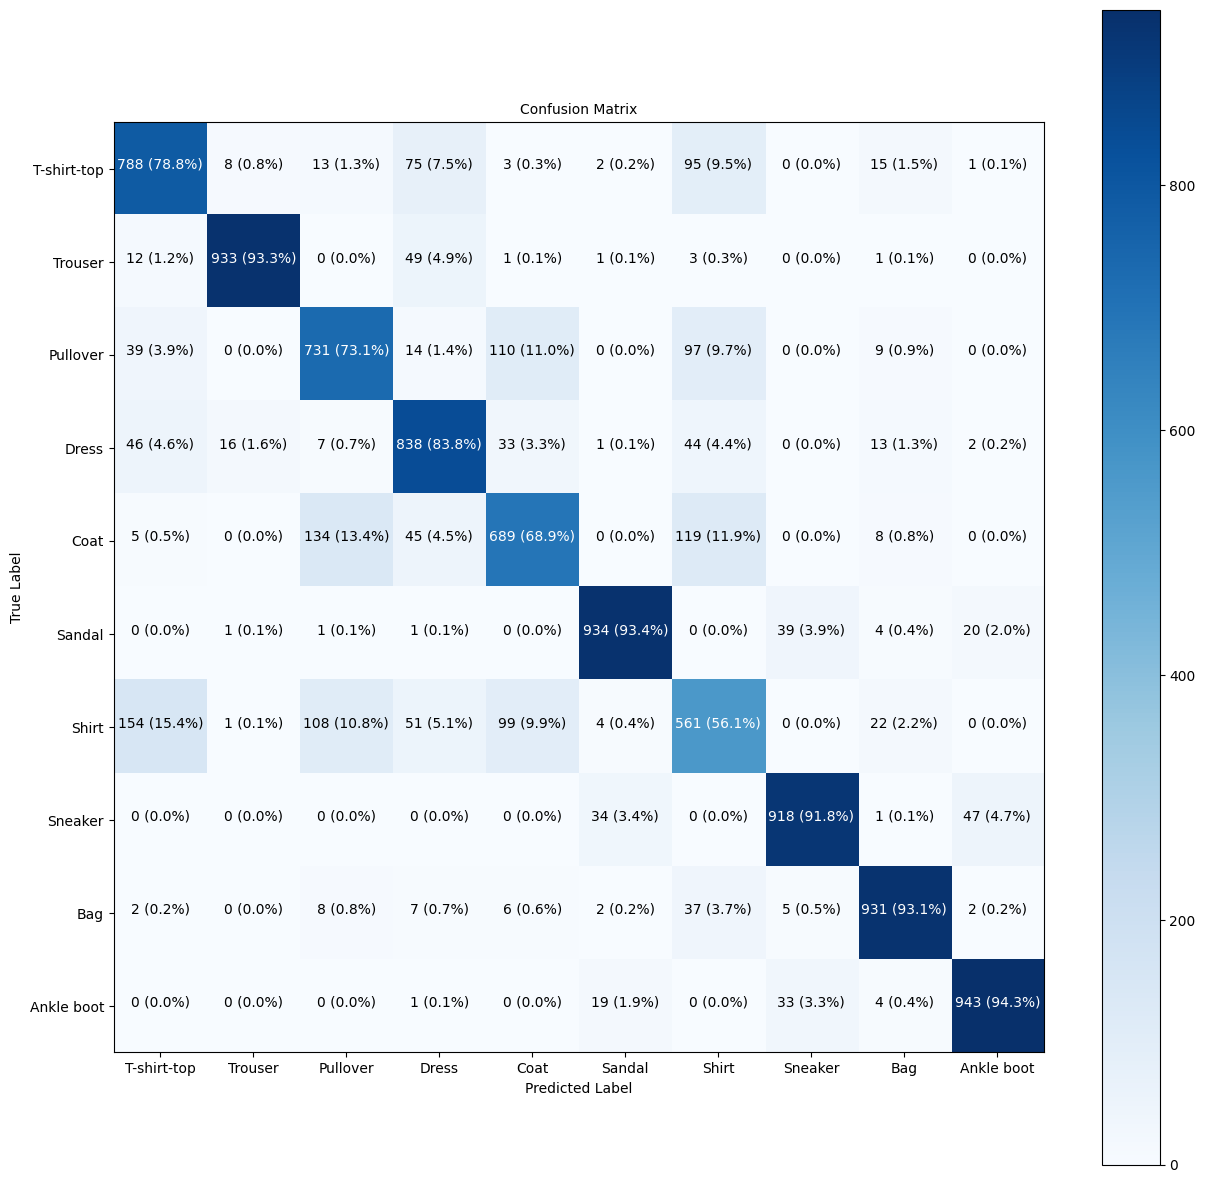

In [ ]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15,15),
                      text_size=10)

> 🔑**Note:** Often when working with images and other forms of visual dta, it's a good idea to visualize as much as possible to develop a further understanding of the data and the inputs and outputs of your models.

How about we create a fun little function for:
* plot a random image
* Make a prediction on said image
* Label the plot with truth label & the predicted label


In [ ]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plot it and labels it with a prediction and truth label
  """
  # Set up random interger
  rand_int = random.randint(0, len(images))

  # Create preictions and targets
  target_img = images[rand_int]
  pred_probs = model.predict(target_img.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[rand_int]]

  # Plot the image
  plt.imshow(target_img, cmap=plt.cm.binary)

  # Change the color of the titles depends on if the prediction is right or wrong
  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred:{}{:2.0f}% (True:{})".format(pred_label,
                                                100*tf.reduce_max(pred_probs),
                                                true_label),
             color=color)  # Set the color to green or red based on if prediction is right or wrong



1/1 [==============================] - 0s 18ms/step


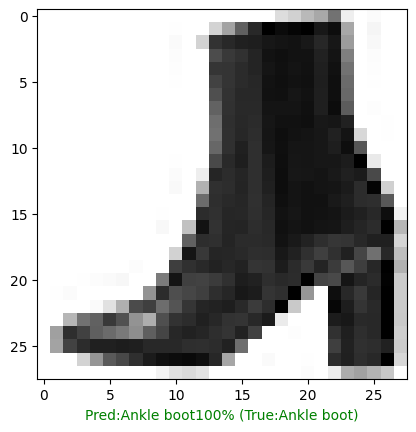

In [ ]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data_norm, # always make predictions on the same kind of ata your model was trained on
                  true_labels=test_labels,
                  classes=class_names)

## What patterns is our model learning?

In [ ]:
# Find the layers of our most recent model
model_14.layers

In [ ]:
# Extract a particular layer
model_14.layers[1]

In [ ]:
# Get the patterns of a layers in our network
weights, biases = model_14.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[-1.18178956e-01,  6.08115196e-01,  3.62874240e-01, ...,
          1.91658825e-01, -3.23096961e-02,  1.43613428e-01],
        [ 5.58870077e-01,  1.10169947e+00, -7.78401673e-01, ...,
         -6.05152786e-01,  4.55759019e-02,  6.83387071e-02],
        [ 1.03484809e-01,  4.47709292e-01,  6.37009591e-02, ...,
         -1.04194486e+00, -3.61473635e-02, -3.06712151e-01],
        ...,
        [ 7.15532303e-02,  1.34940088e-01, -3.90099406e-01, ...,
         -3.57425660e-01,  2.35867500e-03,  9.04049098e-01],
        [-2.56352983e-02,  3.60075027e-01, -1.30763352e+00, ...,
          1.51644766e-01, -1.09216794e-02,  5.63574791e-01],
        [-2.03961864e-01,  4.55623537e-01, -4.16369647e-01, ...,
         -1.25519469e-01,  5.63994050e-04,  4.95654762e-01]], dtype=float32),
 (784, 7))

In [ ]:
model_14.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 7)                 5495      
                                                                 
 dense_1 (Dense)             (None, 6)                 48        
                                                                 
 dense_2 (Dense)             (None, 10)                70        
                                                                 
Total params: 5613 (21.93 KB)
Trainable params: 5613 (21.93 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Now let's check out the bias vector...

In [ ]:
# Bias and biases shapes
biases, biases.shape

(array([ 0.6082347 ,  0.49454868,  0.48676962,  0.24680479,  1.1191    ,
        -0.01128481,  0.34885624], dtype=float32),
 (7,))

Every neuron has a bias vector. Each of these is paired with a weights matrix.

The bias vector get initialized as zeros(at least in the case of a TensorFlow Dense layer)

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [ ]:
model_14.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 7)                 5495      
                                                                 
 dense_1 (Dense)             (None, 6)                 48        
                                                                 
 dense_2 (Dense)             (None, 10)                70        
                                                                 
Total params: 5613 (21.93 KB)
Trainable params: 5613 (21.93 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


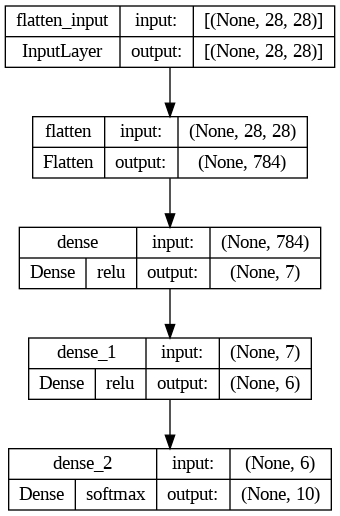

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model = model_14, show_shapes = True, show_layer_activations=True)

# Next: Check out the exercises and extra curriculum...